# Sephora Dataset Analysis

In [27]:
import os
import sys

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")

    # Clone repository if in Colab
    if not os.path.exists('/content/math_120_final_project/'):
        !git clone https://github.com/lizlemus0811/math_120_final_project.git

    # Change to project directory
    os.chdir('/content/math_120_final_project')

except ImportError:
    IN_COLAB = False
    print("Running locally")

# Add src directory to Python path
if 'src' not in sys.path:
    sys.path.append('src')

print(f"Current working directory: {os.getcwd()}")

Running in Google Colab
Cloning into 'math_120_final_project'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 19 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 1.33 MiB | 14.77 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Current working directory: /content/math_120_final_project


## Project Overview
This project explores consumer sentiment regarding inclusivity in makeup brands using product reviews. I will compare sentiment between brands known for being inclusive and those that have faced criticism for limited shade ranges or accessibility. The analysis includes basic review exploration, sentiment scoring with VADER (SID), and visualization of trends across brands. The goal is to understand how consumers perceive inclusivity in the beauty industry and identify patterns in positive and negative feedback.

## 1. Setup and Data Loading

###  Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###  Mount Google Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Define Data Path

In [8]:
path="/content/drive/MyDrive/data"

###  Load Product Information

In [9]:

product_info= pd.read_csv(path +"/product_info.csv")
product_info.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


###  Load and Concatenate Review Data

In [10]:

review1= pd.read_csv(path +"/reviews_0-250.csv")
review2= pd.read_csv(path +"/reviews_250-500.csv")
review3= pd.read_csv(path +"/reviews_500-750.csv")

all_reviews= pd.concat([review1, review2, review3], ignore_index=True)

/tmp/ipython-input-1712036285.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review1= pd.read_csv(path +"/reviews_0-250.csv")


###  Inspect All Reviews

In [11]:
all_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


## 2. Data Preprocessing

### Define Target Brands

In [12]:
brands_subset = [
    'Fenty Beauty by Rihanna', 'MAC', 'NARS', 'Huda Beauty', 'NYX Professional Makeup',
    'Glossier', 'Cover FX', 'Pat McGrath Labs', 'tarte', 'Rare Beauty by Selena Gomez',
    'Maybelline', 'L’Oréal', 'Revlon', 'Estée Lauder', 'Clinique',
    'Bobbi Brown', 'Too Faced', 'Urban Decay', 'Smashbox', 'e.l.f.'
]

##  Filter Reviews by Brands

In [13]:
filtered_reviews = all_reviews[all_reviews['brand_name'].isin(brands_subset)].copy()

###  Inspect Filtered Reviews

In [14]:
filtered_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
192137,192137,8409505487,5,1.0,1.00,1,0,1,2023-03-15,I usually use make up forever base and then sw...,NaN,lightMedium,brown,combination,black,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0
192138,192138,24758468400,5,1.0,1.00,6,0,6,2023-03-09,I’ve been using this gem for over a month. I l...,Skincare and makeup lovers this is for you,NaN,hazel,normal,NaN,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0
192139,192139,7539923825,5,1.0,0.80,5,1,4,2023-03-01,This is great! My skin has never been more glo...,NaN,fair,hazel,oily,NaN,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0
192140,192140,2852499722,5,1.0,0.75,4,1,3,2023-02-28,This product is a go to for makeup lovers for ...,A great makeup moisturizer/primer,fairLight,blue,dry,brown,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0
192141,192141,7558126609,5,1.0,NaN,0,0,0,2023-02-28,Love love love!! This primer keeps my makeup o...,love this primer!,light,blue,oily,blonde,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0


## 3. Exploratory Data Analysis (EDA)

###  Analyze Brand Review Counts

In [15]:
brand_counts = filtered_reviews['brand_name'].value_counts()
print(brand_counts.head(10))

brand_name
Estée Lauder    16149
tarte            7677
Bobbi Brown      3845
Name: count, dtype: int64


###  Visualize Top 10 Brands by Review Count

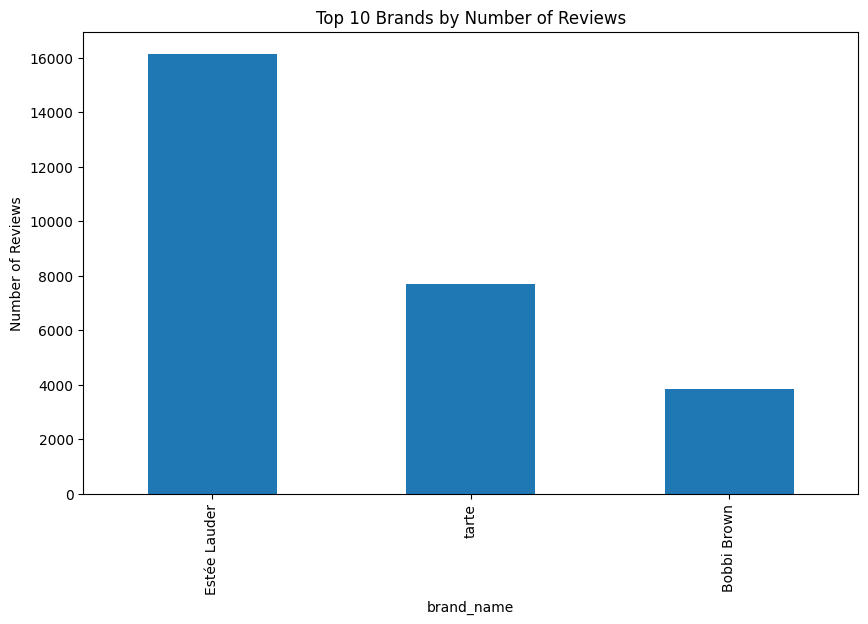

In [16]:
import matplotlib.pyplot as plt

brand_counts.head(10).plot(kind='bar', figsize=(10,6), title='Top 10 Brands by Number of Reviews')
plt.ylabel('Number of Reviews')
plt.show()

### Analyze Review Lengths

In [17]:
all_reviews['review_length'] = all_reviews['review_text'].apply(lambda x: len(str(x).split()))
all_reviews['review_length'].describe()

,review_length
count,925117.000000
mean,60.274237
std,43.470793
min,1.000000
25%,32.000000
50%,50.000000
75%,76.000000
max,1216.000000


###  Visualize Review Length Distribution

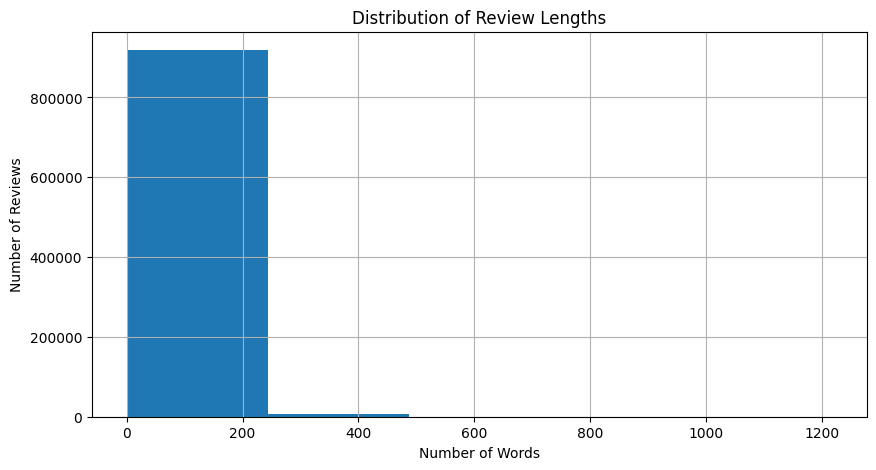

In [18]:
all_reviews['review_length'].hist(bins=5, figsize=(10,5))
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.show()

## 4. Sentiment Analysis

###  Install and Import NLTK

In [19]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install nltk

In [20]:
# import nltk package
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### Initialize Sentiment Analyzer and Test

In [21]:
# instantiate a sentiment classifier
sid = SentimentIntensityAnalyzer()

test = "I hated this foundation, it broke out my face."

print(test)
sid.polarity_scores(test)

I hated this foundation, it broke out my face.


{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.7906}

### Select Relevant Columns for Sentiment Analysis

In [22]:
filtered_reviews[['product_name', 'brand_name','review_text']]

,product_name,brand_name,review_text
192137,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,I usually use make up forever base and then sw...
192138,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,I’ve been using this gem for over a month. I l...
192139,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,This is great! My skin has never been more glo...
192140,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,This product is a go to for makeup lovers for ...
192141,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,Love love love!! This primer keeps my makeup o...
...,...,...,...
908680,Hydrating Eye Cream,Bobbi Brown,I had high hopes for this eye cream but it bur...
908681,Hydrating Eye Cream,Bobbi Brown,I’ve ordered Bobbi Brown skincare products for...
908682,Hydrating Eye Cream,Bobbi Brown,I have been using this eye cream for years and...
908683,Hydrating Eye Cream,Bobbi Brown,The lady at the counter told me I have extreme...


In [23]:
filtered_reviews['brand_name'].value_counts()

,count
brand_name,
Estée Lauder,16149
tarte,7677
Bobbi Brown,3845


###  Calculate Sentiment Scores

In [24]:
filtered_reviews['sentiment_score'] = filtered_reviews['review_text'].astype(str).apply(lambda x: sid.polarity_scores(x)['compound'])

###  Label Sentiment

In [25]:
def label_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

filtered_reviews['sentiment_label'] = filtered_reviews['sentiment_score'].apply(label_sentiment)

###  Display Filtered Reviews with Sentiment

In [26]:
filtered_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,sentiment_score,sentiment_label
192137,192137,8409505487,5,1.0,1.00,1,0,1,2023-03-15,I usually use make up forever base and then sw...,...,lightMedium,brown,combination,black,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0,0.4215,positive
192138,192138,24758468400,5,1.0,1.00,6,0,6,2023-03-09,I’ve been using this gem for over a month. I l...,...,NaN,hazel,normal,NaN,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0,0.8685,positive
192139,192139,7539923825,5,1.0,0.80,5,1,4,2023-03-01,This is great! My skin has never been more glo...,...,fair,hazel,oily,NaN,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0,0.9608,positive
192140,192140,2852499722,5,1.0,0.75,4,1,3,2023-02-28,This product is a go to for makeup lovers for ...,...,fairLight,blue,dry,brown,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0,0.9457,positive
192141,192141,7558126609,5,1.0,NaN,0,0,0,2023-02-28,Love love love!! This primer keeps my makeup o...,...,light,blue,oily,blonde,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0,0.9744,positive


# Early Methods Notes

- Use VADER (SID) for sentiment analysis.
- Classify reviews as positive, neutral, or negative.
- Compare sentiment across inclusive and non-inclusive brands.
- Explore keywords related to inclusivity and shade range.
- Optionally, analyze sentiment trends over time if submission timestamps are available.
